# OpenSpace Asset for Ship Track


Alex Bock  Today at 4:33 AM
I think @Micah did something with a ships' trail a while ago. If I remember correctly, it was also using the trajectory file. Probably the best way is to look at the way the positions for the Apollo 11 landing sites are specified in here: https://github.com/OpenSpace/OpenSpace/blob/master/data/assets/scene/solarsystem/missions/apollo/11/lem_descent.asset It basically creates a TimelineTranslation which is indexed by time and the passed into a TrailTrajectory here: https://github.com/OpenSpace/OpenSpace/blob/master/data/assets/scene/solarsystem/missions/apollo/11/apollo11.asset#L133-L151
Checked and there is currently no way to perserve the time information in the GeoJSON. I did make an issue to track it though: https://github.com/OpenSpace/OpenSpace/issues/3701


In [45]:
import pandas as pd
from datetime import datetime as dt
df = pd.read_csv("tmp/RR2402_1min.geoCSV", comment = '#')
from datetime import datetime as dt
df['datetime'] = pd.to_datetime(df['iso_time'])
df.index = df['datetime']
df = df.resample("60min").first()
df = df.reset_index(drop=True)
df.head()

iso_time  ship_longitude  ship_latitude  speed_made_good  \
0  2024-02-16T23:59:59.00Z     -117.236072      32.706520             0.00   
1  2024-02-17T00:01:00.00Z     -117.236062      32.706543             0.15   
2  2024-02-17T01:00:00.00Z     -117.236037      32.706492             0.33   
3  2024-02-17T02:00:00.00Z     -117.236057      32.706517             0.15   
4  2024-02-17T03:00:00.00Z     -117.236055      32.706518             0.00   

   course_made_good                  datetime  
0            40.213 2024-02-16 23:59:59+00:00  
1           180.000 2024-02-17 00:01:00+00:00  
2             0.000 2024-02-17 01:00:00+00:00  
3            59.400 2024-02-17 02:00:00+00:00  
4            90.000 2024-02-17 03:00:00+00:00

In [71]:
from openspace_rvdata import tracks as trk
trk.get_cruise_keyframes('tmp/RR2402_1min.geoCSV')


                  iso_time  ship_longitude  ship_latitude  speed_made_good  \
0  2024-02-16T23:59:59.00Z     -117.236072      32.706520             0.00   
1  2024-02-17T00:01:00.00Z     -117.236062      32.706543             0.15   
2  2024-02-17T01:00:00.00Z     -117.236037      32.706492             0.33   

   course_made_good                  datetime  
0            40.213 2024-02-16 23:59:59+00:00  
1           180.000 2024-02-17 00:01:00+00:00  
2             0.000 2024-02-17 01:00:00+00:00  
Successfully generated 'keyframes/RR2402_keyframes.asset' with the formatted data.


In [ ]:
# def get_comment_dataframe(fname):
#     """
#     Reads a CSV file, extracts lines starting with '#', and returns them as a pandas DataFrame.

#     Args:
#         fname (str): The path to the CSV file.

#     Returns:
#         pandas.DataFrame: A DataFrame where the index represents the extracted
#                           keys from comment lines (e.g., 'dataset', 'title'),
#                           and the 'Value' column contains their corresponding values.
#                           Returns an empty DataFrame if the file is not found or no
#                           comment lines are present.
#     """
#     comment_data = {}
#     try:
#         with open(fname, 'r', encoding='utf-8') as f:
#             for line in f:
#                 # Check if the line starts with '#' after stripping leading/trailing whitespace
#                 if line.strip().startswith('#'):
#                     # Remove the '#' and any leading/trailing whitespace from the start of the line
#                     processed_line = line.strip().lstrip('#').strip()
#                     if ':' in processed_line:
#                         # Split by the first colon to separate key and value
#                         key, value = processed_line.split(':', 1)
#                         comment_data[key.strip()] = value.strip()
#                     else:
#                         # If a line doesn't have a key:value format, store it with a generic key
#                         # This handles cases like a standalone comment line without a colon
#                         comment_data[f"unparsed_line_{len(comment_data)}"] = processed_line
#     except FileNotFoundError:
#         print(f"Error: The file '{fname}' was not found.")
#         return pd.DataFrame(columns=['Value']) # Return an empty DataFrame on error
#     except Exception as e:
#         print(f"An error occurred while reading the file: {e}")
#         return pd.DataFrame(columns=['Value']) # Return an empty DataFrame on error

#     # Convert the dictionary to a pandas DataFrame
#     # The dictionary keys become the DataFrame's index, and values go into the 'Value' column
#     df_comments = pd.DataFrame.from_dict(comment_data, orient='index', columns=['Value'])
#     return df_comments

In [43]:
# # --- Example Usage ---
# # Create a dummy CSV file for demonstration purposes
# dummy_csv_content = """#dataset: GeoCSV 2.0
# #title: Processed Trackline Navigation Data: One Minute Resolution
# #field_unit: ISO_8601,degree_east,degree_north,meter/second,degree
# #field_type: datetime,float,float,float,float
# #ellipsoid: WGS-84 (EPSG:4326)
# #this is a general comment
# iso_time,ship_longitude,ship_latitude,speed_made_good,course_made_good
# 2024-10-15T00:00:00.00Z,-70.672198,41.524042,0.11,159.406
# """
# dummy_filename = "data.csv"
# with open(dummy_filename, "w", encoding="utf-8") as f:
#     f.write(dummy_csv_content)

# # Call the function with the dummy filename
# comment_df = get_comment_dataframe(dummy_filename)

# # Print the resulting DataFrame
# print(comment_df)

# Example of handling a non-existent file
print("\n--- Testing with a csv file")
foo = get_comment_dataframe("tmp/RR2402_1min.geoCSV")
print(foo)


--- Testing with a csv file
                                                                 Value
dataset                                                     GeoCSV 2.0
title                Processed Trackline Navigation Data: One Minut...
field_unit           ISO_8601,degree_east,degree_north,meter/second...
field_type                            datetime,float,float,float,float
field_standard_name  iso_time,ship_longitude,ship_latitude,speed_ma...
field_long_name      date and time,longitude of vessel,latitude of ...
standard_name_cv                    http://www.rvdata.us/voc/fieldname
ellipsoid                                           WGS-84 (EPSG:4326)
delimiter                                                            ,
field_missing                                                      NAN
attribution          Rolling Deck to Repository (R2R) Program; http...
source_repository                                  doi:10.17616/R39C8D
source_event                                    

In [80]:
import pandas as pd
from datetime import datetime as dt
import openspace_rvdata.r2r2df as r2r

url = r2r.get_r2r_url(vessel_name = "Palmer")
mdf = r2r.get_cruise_metadata(url)
# print(mdf.head())
mdf.columns

Index(['cruise_id', 'cruise_name', 'cruise_type', 'cruise_url', 'cruise_doi',
       'is_registered', 'vessel_ices_code', 'vessel_id', 'vessel_name',
       'vessel_shortname', 'operator_id', 'operator_name', 'scheduler_id',
       'waterbody_id', 'waterbody_name', 'depart_date', 'depart_port_id',
       'depart_port_name', 'depart_port_fullname', 'arrive_date',
       'arrive_port_id', 'arrive_port_name', 'arrive_port_fullname',
       'chief_scientist', 'has_r2rnav', 'release_person_id',
       'release_person_id_sent', 'release_date', 'release_date_sent',
       'release_sent', 'release_option', 'is_ingmrt', 'is_blanket_release',
       'vessel_acronym', 'longitude_min', 'longitude_max', 'latitude_min',
       'latitude_max', 'cruise_reports', 'redirect_to_mgds', 'keyword_list'],
      dtype='object')

In [81]:
mdf['depart_date']

0     2023-05-23
1     2023-03-26
2     2023-01-16
3     2022-12-26
4     2022-05-19
         ...    
257   1992-09-18
258   1992-08-23
259   1992-07-11
260   1992-05-20
261   1992-04-16
Name: depart_date, Length: 262, dtype: datetime64[ns]

In [79]:
# import pandas as pd
# import os

# def get_cruise_asset(mdf: pd.DataFrame):
#     """
#     Generates and saves a Lua asset file for each cruise in the DataFrame.

#     Each Lua file is named 'tmp/{cruise_id}.asset' and contains dynamic
#     information from the cruise's row in the DataFrame.

#     Args:
#         mdf (pd.DataFrame): The input DataFrame containing cruise metadata.
#                             Expected columns (after stripping whitespace):
#                             'cruise_id', 'cruise_name', 'cruise_doi',
#                             'depart_date', 'arrival_date'.
#                             'depart_date' and 'arrival_date' should be in 'YYYY-MM-DD' format.
#     """

#     # Ensure the 'tmp' directory exists
#     output_directory = "tmp"
#     os.makedirs(output_directory, exist_ok=True)
#     print(f"Ensuring output directory '{output_directory}' exists.")

#     # Clean up column names by stripping whitespace
#     mdf.columns = mdf.columns.str.strip()

#     # Iterate through each row (cruise) in the DataFrame
#     for index, row in mdf.iterrows():
#         try:
#             cruise_id = row['cruise_id']
#             cruise_name = row['cruise_name']
#             cruise_doi = row['cruise_doi']
            
#             # Convert dates to ISO 8601 format required by OpenSpace Lua assets
#             # Assuming 'depart_date' and 'arrival_date' are in 'YYYY-MM-DD' string format
#             # If they are datetime objects, convert them first.
#             depart_date_str = pd.to_datetime(row['depart_date']).strftime("%Y-%m-%dT%H:%M:%S.00Z")
#             arrival_date_str = pd.to_datetime(row['arrival_date']).strftime("%Y-%m-%dT%H:%M:%S.00Z")

#             # --- Construct the Lua asset content using an f-string ---
#             # Double curly braces {{ and }} are used to escape literal curly braces in the Lua syntax
#             # so that they are not interpreted as f-string placeholders.
#             lua_content = f"""local sun = asset.require("scene/solarsystem/sun/transforms")
# local earthTransforms = asset.require("scene/solarsystem/planets/earth/earth")

# -- Define the ship model resource
# local shipModel = asset.resource({{
#   Name = "3DBenchy Model",
#   Type = "UrlSynchronization",
#   Identifier = "3dbenchy_model",
#   Url = "https://github.com/CreativeTools/3DBenchy/raw/master/Single-part/3DBenchy.stl", -- Use 'raw' URL for direct file access
#   Version = 1
# }})

# -- The keyframes for the ship's trajectory
# local shipKeyframes = asset.require("./{cruise_id}_keyframes") -- Assumes {cruise_id}_keyframes.asset defines 'keyframes'

# -- Define the ship's position based on the keyframes
# local shipPosition = {{
#   Identifier = "ShipPosition_{cruise_id}",
#   Parent = earthTransforms.Earth.Identifier, -- Parent the asset to Earth
#   TimeFrame = {{
#     Type = "TimeFrameInterval",
#     Start = "{depart_date_str}",
#     End = "{arrival_date_str}"
#   }},
#   Transform = {{
#     Translation = {{
#       Type = "TimelineTranslation",
#       Keyframes = shipKeyframes.keyframes
#     }}
#   }},
#   GUI = {{
#     Name = "{cruise_id} Position",
#     Path = "/Ship Tracks" -- A new path for your custom asset
#   }}
# }}

# -- Define the ship model to be rendered
# local shipRenderable = {{
#   Identifier = "ShipModel_{cruise_id}",
#   Parent = shipPosition.Identifier,
#   TimeFrame = {{
#     Type = "TimeFrameInterval",
#     Start = "{depart_date_str}",
#     End = "{arrival_date_str}"
#   }},
#   Transform = {{
#     Scale = {{
#       Type = "StaticScale",
#       Scale = 1000.0 -- You might need to adjust this scale based on your model's size and desired visibility
#     }}
#   }},
#   Renderable = {{
#     Type = "RenderableModel",
#     GeometryFile = shipModel .. "3DBenchy.stl", -- Reference the synchronized STL model
#     LightSources = {{
#       sun.LightSource,
#       {{
#         Identifier = "Camera",
#         Type = "CameraLightSource",
#         Intensity = 0.5
#       }}
#     }}
#   }},
#   GUI = {{
#     Name = "{cruise_id} Model",
#     Path = "/Ship Tracks"
#   }}
# }}

# -- Define the trail for the ship's trajectory
# local shipTrail = {{
#   Identifier = "ShipTrail_{cruise_id}",
#   Parent = earthTransforms.Earth.Identifier, -- Parent the trail to Earth
#   Renderable = {{
#     Type = "RenderableTrailTrajectory",
#     Enabled = true, -- Set to true to show the trail by default
#     Translation = {{
#       Type = "TimelineTranslation",
#       Keyframes = shipKeyframes.keyframes
#     }},
#     Color = {{ 1.0, 0.5, 0.0 }}, -- An orange trail for visibility (RGB values 0-1)
#     StartTime = "{depart_date_str}",
#     EndTime = "{arrival_date_str}",
#     SampleInterval = 60, -- Sample every 60 seconds
#     EnableFade = true -- Enable fade for the trail
#   }},
#   GUI = {{
#     Name = "{cruise_id} Trail",
#     Path = "/Ship Tracks",
#     Focusable = false
#   }}
# }}

# asset.onInitialize(function()
#   openspace.addSceneGraphNode(shipPosition)
#   openspace.addSceneGraphNode(shipRenderable)
#   openspace.addSceneGraphNode(shipTrail)
# end)

# asset.onDeinitialize(function()
#   openspace.removeSceneGraphNode(shipTrail)
#   openspace.removeSceneGraphNode(shipRenderable)
#   openspace.removeSceneGraphNode(shipPosition)
# end)

# asset.export(shipPosition)
# asset.export(shipRenderable)
# asset.export(shipTrail)

# asset.meta = {{
#   Name = "Ship Track Position: {cruise_id}",
#   Description = [[This asset provides position information for the ship track for the cruise {cruise_id}: {cruise_name}.]],
#   Author = "OpenSpace Team",
#   URL = "http://doi.org/{cruise_doi}",
#   License = "MIT license"
# }}
# """
#             # --- Save the content to a file ---
#             file_path = os.path.join(output_directory, f"{cruise_id}.asset")
#             with open(file_path, "w") as f:
#                 f.write(lua_content)
#             print(f"Generated asset file: {file_path}")

#         except KeyError as e:
#             print(f"Skipping row due to missing column: {e}. Check DataFrame columns.")
#             print(f"Row data: {row.to_dict()}")
#         except Exception as e:
#             print(f"An unexpected error occurred for cruise '{row.get('cruise_id', 'N/A')}': {e}")


# # --- Example Usage ---
# if __name__ == "__main__":
#     # Create a sample DataFrame that mimics your structure,
#     # including placeholder 'depart_date' and 'arrival_date' for demonstration.
#     data = {
#         'cruise_id': ['NBP2304', 'NBP2303', 'NBP2302', 'NBP2301', 'NBP2205'],
#         'cruise_name': ['Transit', 'Biodiversity and Systematics', 'Bart Coring', 'Bart Seismic', 'Sanders/Bernard/Huckstadt'],
#         'cruise_type': ['transit', 'op_science', 'op_science', 'op_science', 'op_science'],
#         'cruise_url': [None, None, None, None, 'https://service.rvdata.us/data/cruise/NBP2205/...'],
#         'cruise_doi': ['10.7284/910224', '10.7284/910223', '10.7284/909920', '10.7284/909919', '10.7284/909918'],
#         'is_registered': [True, True, True, True, True],
#         'vessel_ices_code': [3206, 3206, 3206, 3206, 3206],
#         'vessel_id': ['Nathaniel B. Palmer', 'Nathaniel B. Palmer', 'Nathaniel B. Palmer', 'Nathaniel B. Palmer', 'Nathaniel B. Palmer'],
#         'vessel_name': ['Nathaniel B. Palmer', 'Nathaniel B. Palmer', 'Nathaniel B. Palmer', 'Nathaniel B. Palmer', 'Nathaniel B. Palmer'],
#         'vessel_shortname': ['Palmer', 'Palmer', 'Palmer', 'Palmer', 'Palmer'],
#         'is_ingmrt': [False, False, False, False, False],
#         'is_blanket_release': [None, None, None, None, None],
#         'vessel_acronym': ['NBP', 'NBP', 'NBP', 'NBP', 'NBP'],
#         'longitude_min': [float('nan'), float('nan'), 165.795051, 172.955906, -72.770944],
#         'longitude_max': [float('nan'), float('nan'), -143.201263, -178.345358, -61.125255],
#         'latitude_min': [float('nan'), float('nan'), -77.842218, -77.473966, -69.293656],
#         'latitude_max': [float('nan'), float('nan'), -55.975644, -55.095390, -58.241163],
#         'cruise_reports': [None, None, None, None, 'https://service.rvdata.us/data/cruise/NBP2205/...'],
#         'redirect_to_mgds': [False, False, False, False, False],
#         'keyword_list': [
#             '[usap marine managerpalmernbp2304acqsysacquisi...',
#             '[mahon, andrewpalmernbp2303acqsysacquisition s...',
#             '[bart, philippalmernbp2302acqsysacquisition sy...',
#             '[bart, philippalmernbp2301acqsysacquisition sy...',
#             '[huckstadt, luissanders, robertbernard, kimpal...'
#         ],
#         # Add placeholder date columns for the Lua TimeFrame
#         'depart_date': ['2023-01-01', '2023-02-15', '2023-03-10', '2023-04-05', '2022-05-20'],
#         'arrival_date': ['2023-01-31', '2023-03-05', '2023-03-25', '2023-04-20', '2022-06-15']
#     }
#     mdf_sample = pd.DataFrame(data)

#     print("Sample DataFrame:")
#     print(mdf_sample.iloc[:, :10]) # Print first few columns for brevity
#     print(mdf_sample.iloc[:, 10:]) # Print remaining columns
#     print("\n")

#     # Call the function to generate assets
#     get_cruise_asset(mdf_sample)

#     # You can then check the 'tmp' directory for the generated .asset files
#     print("\nGenerated files (if any):")
#     for f_name in os.listdir("tmp"):
#         if f_name.endswith(".asset"):
#             print(f"- {f_name}")
#             # Optionally, print content of one of the generated files to verify
#             # if f_name == "NBP2304.asset":
#             #     with open(os.path.join("tmp", f_name), "r") as f:
#             #         print("\n--- Content of NBP2304.asset ---")
#             #         print(f.read())
#             #         print("---------------------------------")
            


Sample DataFrame:
  cruise_id                   cruise_name cruise_type  \
0   NBP2304                       Transit     transit   
1   NBP2303  Biodiversity and Systematics  op_science   
2   NBP2302                   Bart Coring  op_science   
3   NBP2301                  Bart Seismic  op_science   
4   NBP2205     Sanders/Bernard/Huckstadt  op_science   

                                          cruise_url      cruise_doi  \
0                                               None  10.7284/910224   
1                                               None  10.7284/910223   
2                                               None  10.7284/909920   
3                                               None  10.7284/909919   
4  https://service.rvdata.us/data/cruise/NBP2205/...  10.7284/909918   

   is_registered  vessel_ices_code            vessel_id          vessel_name  \
0           True              3206  Nathaniel B. Palmer  Nathaniel B. Palmer   
1           True              3206  Nathaniel 

NameError: name 'output_directory' is not defined

In [4]:
import pandas as pd
import os

def get_cruise_asset(mdf: pd.DataFrame):
    """
    Generates and saves a Lua asset file for each cruise in the DataFrame,
    and a separate Lua asset file for each unique ship model (vessel).

    Each cruise Lua file is named 'tmp/{cruise_id}.asset' and contains dynamic
    information from the cruise's row in the DataFrame, referencing a shared
    ship model asset.

    Each ship model Lua file is named 'tmp/{vessel_shortname}_model.asset'
    and defines the 3D model resource for that vessel.

    Args:
        mdf (pd.DataFrame): The input DataFrame containing cruise metadata.
                            Expected columns (after stripping whitespace):
                            'cruise_id', 'cruise_name', 'cruise_doi',
                            'depart_date', 'arrival_date', 'vessel_shortname'.
                            'depart_date' and 'arrival_date' should be in 'YYYY-MM-DD' format.
    """

    # Ensure the 'tmp' directory exists
    output_directory = "tmp"
    os.makedirs(output_directory, exist_ok=True)
    print(f"Ensuring output directory '{output_directory}' exists.")

    # Clean up column names by stripping whitespace
    mdf.columns = mdf.columns.str.strip()

    # --- Generate unique ship model asset files ---
    # Use 'vessel_shortname' to identify unique ships and generate a model for each.
    unique_vessel_shortnames = mdf['vessel_shortname'].unique()
    print(f"Found {len(unique_vessel_shortnames)} unique ship models to define.")

    for vessel_name in unique_vessel_shortnames:
        # Define a safe identifier for the asset file name
        # Replace spaces and other problematic characters for file names and Lua identifiers
        safe_vessel_id = vessel_name.replace(" ", "_").replace("/", "_").replace("\\", "_").replace(".", "_").replace("-", "_")
        model_asset_filename = f"{safe_vessel_id}_model"
        
        # --- Construct the Lua asset content for the ship model ---
        # The URL for the 3D model is hardcoded to 3DBenchy for now.
        # If different ships have different models, you would extend this logic,
        # perhaps by looking up the model URL based on 'vessel_name' from another source
        # or adding a 'model_url' column to your DataFrame.
        ship_model_content = f"""local shipModel = asset.resource({{
    Name = "{vessel_name} Model",
    Type = "UrlSynchronization",
    Identifier = "{safe_vessel_id}_3d_model", -- Unique identifier for the resource
    Url = "https://github.com/CreativeTools/3DBenchy/raw/master/Single-part/3DBenchy.stl",
    Version = 1
}})

asset.export(shipModel)
"""
        model_file_path = os.path.join(output_directory, f"{model_asset_filename}.asset")
        with open(model_file_path, "w") as f:
            f.write(ship_model_content)
        print(f"Generated ship model asset file: {model_file_path}")

    # --- Iterate through each row (cruise) in the DataFrame to generate cruise assets ---
    for index, row in mdf.iterrows():
        try:
            cruise_id = row['cruise_id']
            cruise_name = row['cruise_name'] # Still useful for meta description
            cruise_doi = row['cruise_doi']
            vessel_shortname = row['vessel_shortname'] # Get the vessel name for this cruise
            
            # Safe identifier for referencing the ship model asset
            safe_vessel_id = vessel_shortname.replace(" ", "_").replace("/", "_").replace("\\", "_").replace(".", "_").replace("-", "_")
            
            # Convert dates to ISO 8601 format required by OpenSpace Lua assets
            depart_date_str = pd.to_datetime(row['depart_date']).strftime("%Y-%m-%dT%H:%M:%S.00Z")
            arrive_date_str = pd.to_datetime(row['arrive_date']).strftime("%Y-%m-%dT%H:%M:%S.00Z")

            # --- Construct the Lua asset content using an f-string ---
            # Now, we require the ship's model asset based on vessel_shortname.
            lua_content = f"""local sun = asset.require("scene/solarsystem/sun/transforms")
local earthTransforms = asset.require("scene/solarsystem/planets/earth/earth")
local shipModelAsset = asset.require("./{safe_vessel_id}_model") -- Require the ship's model asset

-- The keyframes for the ship's trajectory
local shipKeyframes = asset.require("./{cruise_id}_keyframes") -- Assumes {cruise_id}_keyframes.asset defines 'keyframes'

-- Define the ship's position based on the keyframes
local shipPosition = {{
    Identifier = "ShipPosition_{cruise_id}",
    Parent = earthTransforms.Earth.Identifier, -- Parent the asset to Earth
    TimeFrame = {{
        Type = "TimeFrameInterval",
        Start = "{depart_date_str}",
        End = "{arrive_date_str}"
    }},
    Transform = {{
        Translation = {{
            Type = "TimelineTranslation",
            Keyframes = shipKeyframes.keyframes
        }}
    }},
    GUI = {{
        Name = "{cruise_id} Position",
        Path = "/Ship Tracks" -- A new path for your custom asset
    }}
}}

-- Define the ship model to be rendered
local shipRenderable = {{
    Identifier = "ShipModel_{cruise_id}",
    Parent = shipPosition.Identifier,
    TimeFrame = {{
        Type = "TimeFrameInterval",
        Start = "{depart_date_str}",
        End = "{arrive_date_str}"
    }},
    Transform = {{
        Scale = {{
            Type = "StaticScale",
            Scale = 1000.0 -- You might need to adjust this scale based on your model's size and desired visibility
        }}
    }},
    Renderable = {{
        Type = "RenderableModel",
        GeometryFile = shipModelAsset.shipModel.Identifier, -- Reference the model's identifier from the required asset
        LightSources = {{
            sun.LightSource,
            {{
                Identifier = "Camera",
                Type = "CameraLightSource",
                Intensity = 0.5
            }}
        }}
    }},
    GUI = {{
        Name = "{cruise_id} Model",
        Path = "/Ship Tracks"
    }}
}}

-- Define the trail for the ship's trajectory
local shipTrail = {{
    Identifier = "ShipTrail_{cruise_id}",
    Parent = earthTransforms.Earth.Identifier, -- Parent the trail to Earth
    Renderable = {{
        Type = "RenderableTrailTrajectory",
        Enabled = true, -- Set to true to show the trail by default
        Translation = {{
            Type = "TimelineTranslation",
            Keyframes = shipKeyframes.keyframes
        }},
        Color = {{ 1.0, 0.5, 0.0 }}, -- An orange trail for visibility (RGB values 0-1)
        StartTime = "{depart_date_str}",
        EndTime = "{arrive_date_str}",
        SampleInterval = 60, -- Sample every 60 seconds
        EnableFade = true -- Enable fade for the trail
    }},
    GUI = {{
        Name = "{cruise_id} Trail",
        Path = "/Ship Tracks",
        Focusable = false
    }}
}}

asset.onInitialize(function()
    openspace.addSceneGraphNode(shipPosition)
    openspace.addSceneGraphNode(shipRenderable)
    openspace.addSceneGraphNode(shipTrail)
end)

asset.onDeinitialize(function()
    openspace.removeSceneGraphNode(shipTrail)
    openspace.removeSceneGraphNode(shipRenderable)
    openspace.removeSceneGraphNode(shipPosition)
end)

asset.export(shipPosition)
asset.export(shipRenderable)
asset.export(shipTrail)

asset.meta = {{
    Name = "Ship Track Position: {cruise_id}",
    Description = [[This asset provides position information for the ship track for the cruise {cruise_id} ({vessel_shortname}): {cruise_name}.]],
    Author = "OpenSpace Team",
    URL = "http://doi.org/{cruise_doi}",
    License = "MIT license"
}}
"""
            # --- Save the content to a file ---
            file_path = os.path.join(output_directory, f"{cruise_id}.asset")
            with open(file_path, "w") as f:
                f.write(lua_content)
            print(f"Generated asset file: {file_path}")

        except KeyError as e:
            print(f"Skipping row due to missing column: {e}. Check DataFrame columns.")
            print(f"Row data: {row.to_dict()}")
        except Exception as e:
            print(f"An unexpected error occurred for cruise '{row.get('cruise_id', 'N/A')}': {e}")

In [3]:
mdf.columns

Index(['cruise_id', 'cruise_name', 'cruise_type', 'cruise_url', 'cruise_doi',
       'is_registered', 'vessel_ices_code', 'vessel_id', 'vessel_name',
       'vessel_shortname', 'operator_id', 'operator_name', 'scheduler_id',
       'waterbody_id', 'waterbody_name', 'depart_date', 'depart_port_id',
       'depart_port_name', 'depart_port_fullname', 'arrive_date',
       'arrive_port_id', 'arrive_port_name', 'arrive_port_fullname',
       'chief_scientist', 'has_r2rnav', 'release_person_id',
       'release_person_id_sent', 'release_date', 'release_date_sent',
       'release_sent', 'release_option', 'is_ingmrt', 'is_blanket_release',
       'vessel_acronym', 'longitude_min', 'longitude_max', 'latitude_min',
       'latitude_max', 'cruise_reports', 'redirect_to_mgds', 'keyword_list'],
      dtype='object')

In [5]:
from datetime import datetime as dt
import pandas as pd
import openspace_rvdata.r2r2df as r2r
import openspace_rvdata.geocsv2geojson as g2g

import logging
logger = logging.getLogger(__name__)

# url = r2r.get_r2r_url(cruise_id = "RR2402")
url = r2r.get_r2r_url(vessel_name = "Revelle")
mdf = r2r.get_cruise_metadata(url)
mdf

get_cruise_asset(mdf)

Ensuring output directory 'tmp' exists.
Found 1 unique ship models to define.
Generated ship model asset file: tmp/Revelle_model.asset
Generated asset file: tmp/RR2501.asset
Generated asset file: tmp/RR2415.asset
Generated asset file: tmp/RR2414.asset
Generated asset file: tmp/RR2413.asset
Generated asset file: tmp/RR2412.asset
Generated asset file: tmp/RR2411.asset
Generated asset file: tmp/RR2410.asset
Generated asset file: tmp/RR2409.asset
Generated asset file: tmp/RR2408.asset
Generated asset file: tmp/RR2407.asset
Generated asset file: tmp/RR2406.asset
Generated asset file: tmp/RR2405.asset
Generated asset file: tmp/RR2404.asset
Generated asset file: tmp/RR2403.asset
Generated asset file: tmp/RR2402.asset
Generated asset file: tmp/RR2401.asset
Generated asset file: tmp/RR2312.asset
Generated asset file: tmp/RR2311.asset
Generated asset file: tmp/RR2310.asset
Generated asset file: tmp/RR2309.asset
Generated asset file: tmp/RR2308.asset
Generated asset file: tmp/RR2307.asset
Generat

In [ ]:
import openspace_rvdata.geocsv2geojson as g2g
g2g.convert_geocsv_to_geojson("tmp/ZHNG02RR_1min.geoCSV", "tmp/ZHNG02RR_1min.geoJSON")

In [ ]:
foo.loc['title', 'field_standard_name']

## Quick Approach: GeoJSON
Just want to see the track and don't need it animated? You can use the geocsv2geojson.py code in this folder to generate a GeoJSON file, then drag and drop that directly into OpenSpace. It'll look like this:
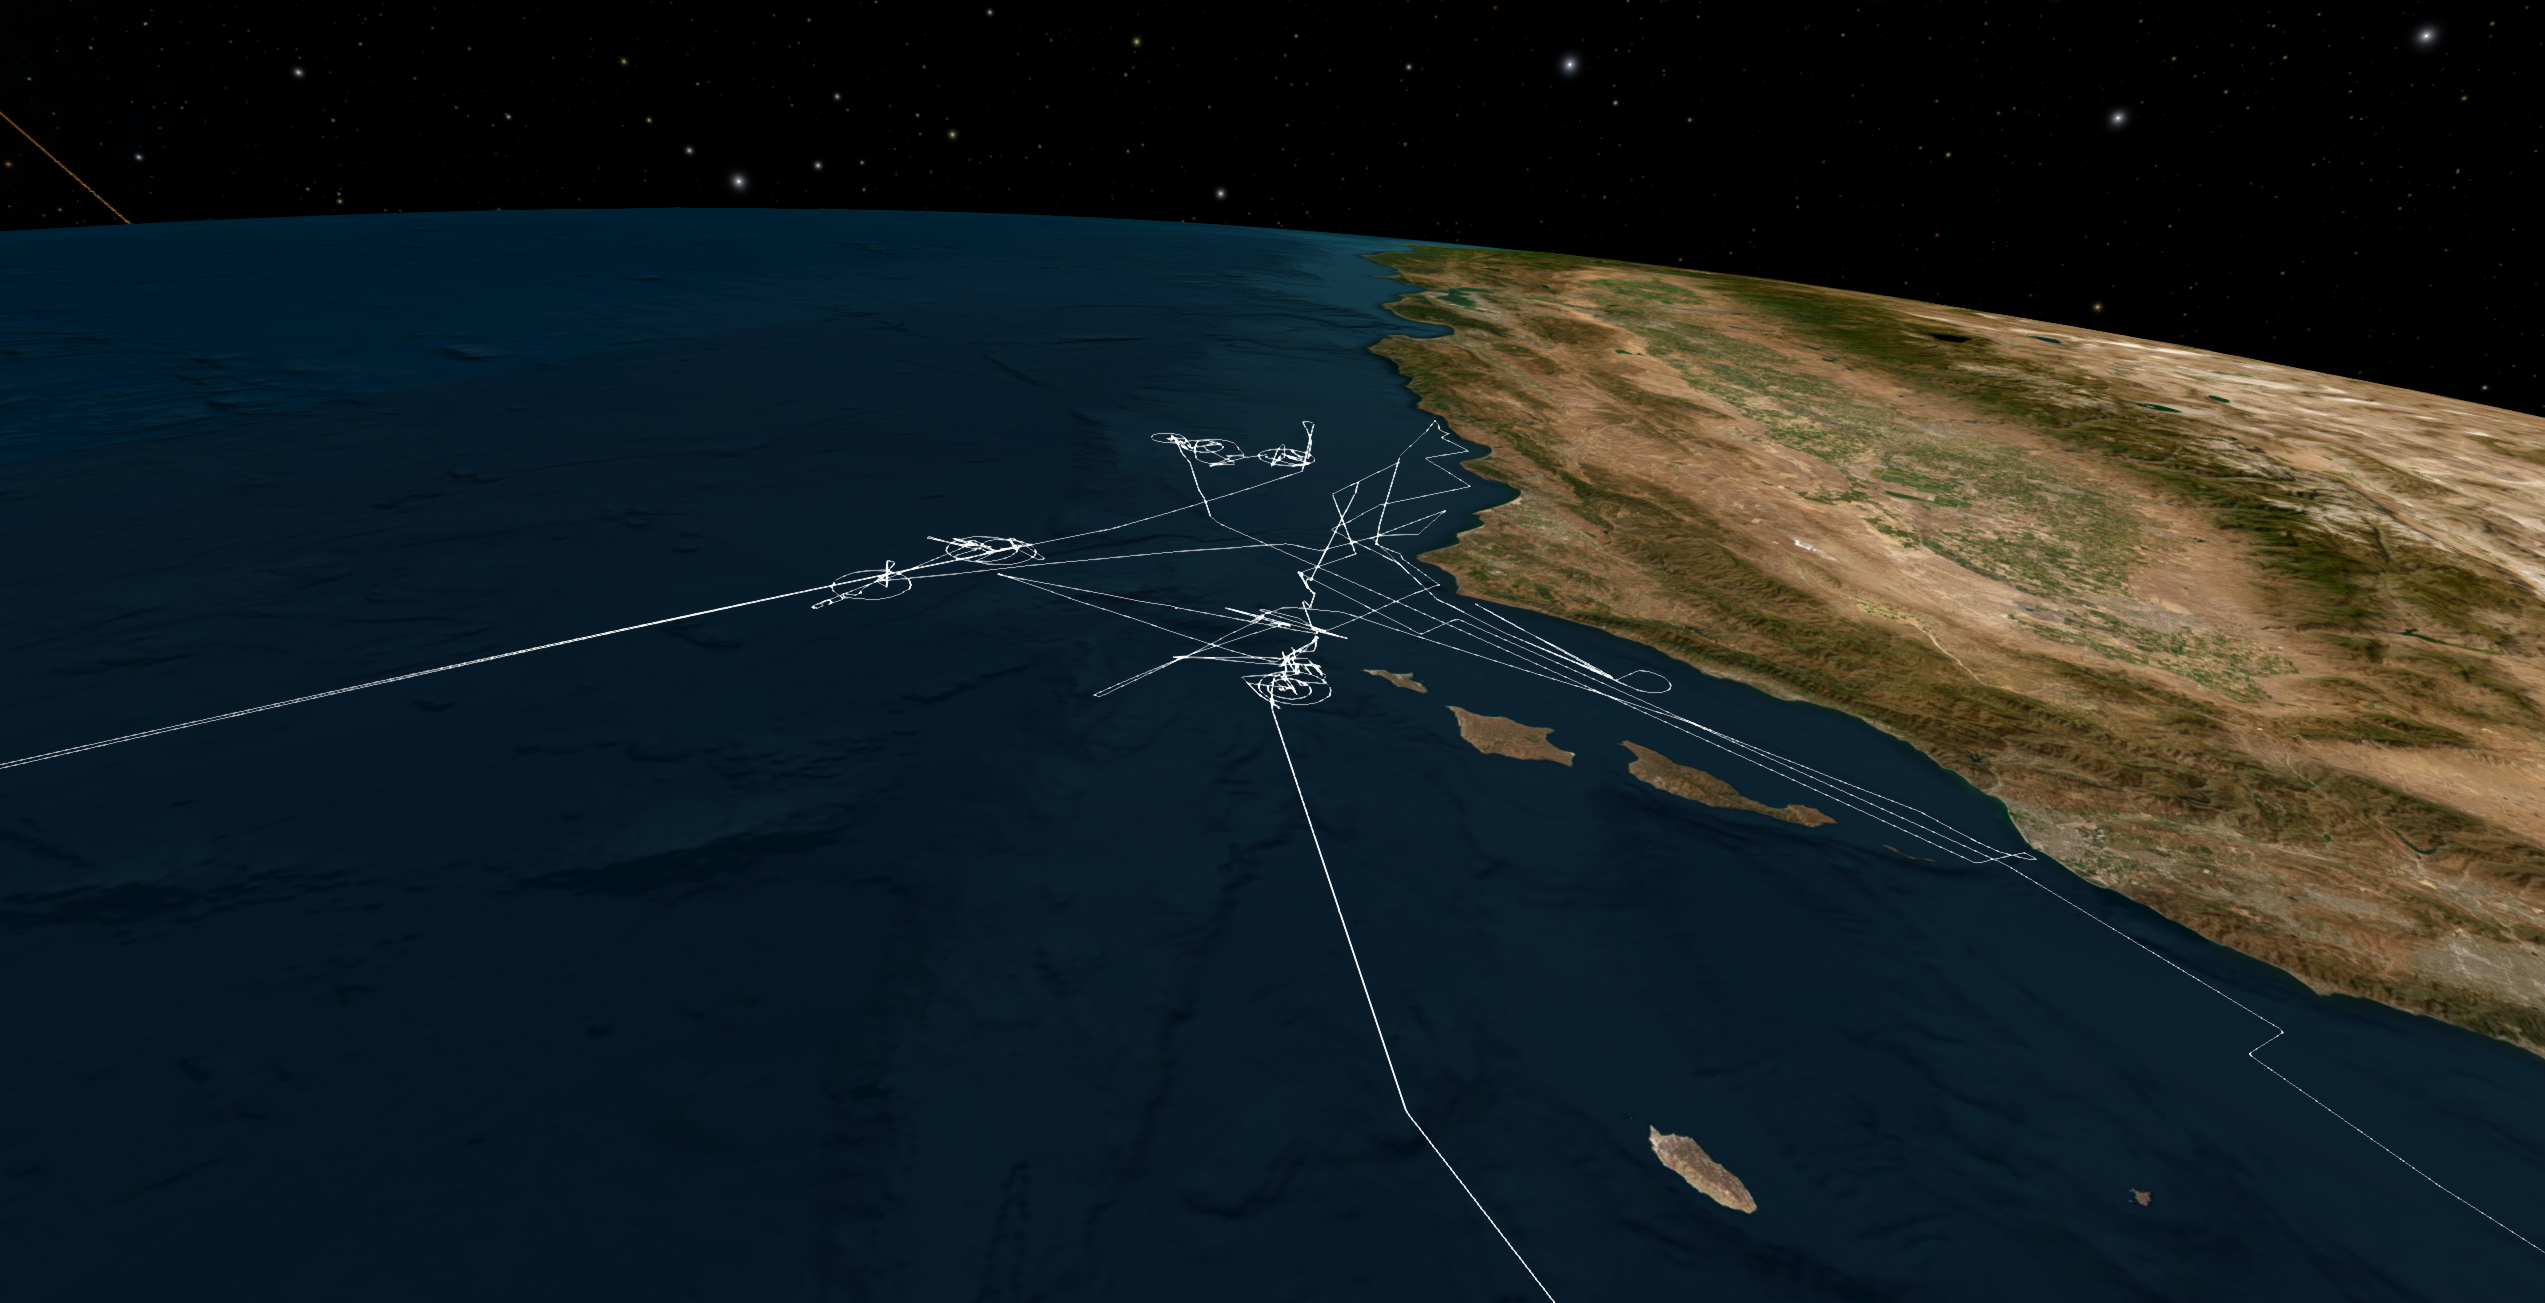

## Animated Version
What we really want, though, is an animated version of the asset that's more similar to a field line or satellite track. This will have two parts: 

### Step 1: Reformat geoCSV to TimelineTranslation
We want to format each line as a keyframe, like this:

```
  ["1969-07-20T20:13:40"] = {
    Type = "GlobeTranslation",
    Globe = "Moon",
    Longitude = 23.64480784327766,
    Latitude = 0.6899960896998255,
    Altitude = -1546.3568594681615,
    UseHeightmap = false
  },
```

For our version:

```
  ["2024-02-16T23:59:59"] = {
    Type = "GlobeTranslation",
    Globe = "Earth",
    Longitude = -117.236072,
    Latitude = 32.70652,
    Altitude = 0,
    SpeedMadeGood = 0.0,
    CourseMadeGood = 40.213,
    UseHeightmap = false
  },
```

TODO: Read the header of the original text file and incoporate it into the metadata of this file.


In [ ]:
# # Function to format each row into the desired text block
# import itertools
# def format_row_to_text(row):
#     # Extract the timestamp, removing the ".00Z" part
#     iso_time_formatted = f'["{row["iso_time"].split(".")[0]}"]'

#     # Construct the formatted string
#     formatted_string = f"""  {iso_time_formatted} = {{
#     Type = "GlobeTranslation",
#     Globe = "Earth",
#     Longitude = {row["ship_longitude"]},
#     Latitude = {row["ship_latitude"]},
#     Altitude = 0,
#     SpeedMadeGood = {row["speed_made_good"]},
#     CourseMadeGood = {row["course_made_good"]},
#     UseHeightmap = false
#   }},"""
#     return formatted_string

# # Apply the function to each row of the DataFrame and print the results
# # for index, row in df.iterrows():
# for index, row in itertools.islice(df.iterrows(), 1):
#     print(format_row_to_text(row))

In [ ]:
# import io

# # Function to format each row into the desired text block
# def format_row_to_text(row):
#     # Extract the timestamp, removing the ".00Z" part
#     iso_time_formatted = f'["{row["iso_time"].split(".")[0]}"]'

#     # Construct the formatted string
#     formatted_string = f"""  {iso_time_formatted} = {{
#     Type = "GlobeTranslation",
#     Globe = "Earth",
#     Longitude = {row["ship_longitude"]},
#     Latitude = {row["ship_latitude"]},
#     Altitude = 0,
#     SpeedMadeGood = {row["speed_made_good"]},
#     CourseMadeGood = {row["course_made_good"]},
#     UseHeightmap = false
#   }}"""
#     return formatted_string

# # Define the "before" and "after" text
# # TODO: copy original CSV header in here, as commented Lua text.
# before_text = """local keyframes = {
# """

# after_text = """}

# asset.export("keyframes", keyframes)

# asset.meta = {
#   Name = "Ship Track Position",
#   Description = [[This asset provides position information for the ship track.]],
#   Author = "OpenSpace Team",
#   URL = "http://doi.org/10.7284/910464",
#   License = "MIT license"
# }
# """

# # Specify the output file name
# # TODO: Pull this from metadata
# output_filename = "RR2402_keyframes.asset"

# # Open the file in write mode and write the content
# with open(output_filename, "w") as f:
#     f.write(before_text) # Write the "before" text first

#     # Iterate through each row of the DataFrame, format it, and write to the file
#     for index, row in df.iterrows():
#         if index<len(df):
#             f.write(format_row_to_text(row) + ",\n") # Add a newline after each entry for readability
#         else:
#             f.write(format_row_to_text(row) + "\n") #skip comma on last entry
#     f.write(after_text) # Write the "after" text

# print(f"Successfully generated '{output_filename}' with the formatted data.")

In [ ]:
fname = "tmp/RR1602_1min.geoCSV"


df = pd.read_csv(fname, comment = '#')
from datetime import datetime as dt
df['datetime'] = pd.to_datetime(df['iso_time'])
df.index = df['datetime']
df = df.resample("60min").first()
df = df.reset_index(drop=True)
df.head()

In [72]:
import io

import openspace_rvdata.geocsv2geojson as g2g
mdf = g2g.get_comment_dataframe(fname)
print(mdf)

                                                                 Value
dataset                                                     GeoCSV 2.0
title                Processed Trackline Navigation Data: One Minut...
field_unit           ISO_8601,degree_east,degree_north,meter/second...
field_type                            datetime,float,float,float,float
field_standard_name  iso_time,ship_longitude,ship_latitude,speed_ma...
field_long_name      date and time,longitude of vessel,latitude of ...
standard_name_cv                    http://www.rvdata.us/voc/fieldname
ellipsoid                                           WGS-84 (EPSG:4326)
delimiter                                                            ,
field_missing                                                      NAN
attribution          Rolling Deck to Repository (R2R) Program; http...
source_repository                                  doi:10.17616/R39C8D
source_event                                        doi:10.7284/910464
source

In [52]:
fname = "/tmp/RR2402_1min.geoCSV"
mdf = g2g.get_comment_dataframe(fname)
mdf.loc["cruise_id", "Value"]

'RR2402'

In [53]:
mdf.loc["source_dataset", "Value"].strip("doi:")

'10.7284/160211'

In [73]:
# cruise_id = "CRUISE_ABC_123"  # Your string variable for cruise ID
# doi_string = "10.1234/some.publication.xyz" # Your string variable for DOI

# after_text = f"""}}
    
#     asset.export("keyframes", keyframes)
    
#     asset.meta = {{
#       Name = "Ship Track Position: {cruise_id}",
#       Description = [[This asset provides position information for the ship track for the cruise {cruise_id}: {cruise_title}]],
#       Author = "OpenSpace Team",
#       URL = "http://doi.org/{cruise_doi}",
#       License = "MIT license"
#     }}
#     """

# print(after_text)

In [65]:
# Function to format each row into the desired text block
def format_row_to_text(row):
    # Extract the timestamp, removing the ".00Z" part
    iso_time_formatted = f'["{row["iso_time"].split(".")[0]}"]'

    # Construct the formatted string
    formatted_string = f"""  {iso_time_formatted} = {{
    Type = "GlobeTranslation",
    Globe = "Earth",
    Longitude = {row["ship_longitude"]},
    Latitude = {row["ship_latitude"]},
    Altitude = 0,
    SpeedMadeGood = {row["speed_made_good"]},
    CourseMadeGood = {row["course_made_good"]},
    UseHeightmap = false
  }}"""
    return formatted_string

def get_cruise_keyframes(fname, resample_rate="60min"):
    df = pd.read_csv(fname, comment = '#')
    df['datetime'] = pd.to_datetime(df['iso_time'])
    df.index = df['datetime']
    df = df.resample(resample_rate).first()
    df = df.reset_index(drop=True)
    print(df.head(3))
    # Define the "before" and "after" text

    # Let's start by getting metadata:
    mdf = g2g.get_comment_dataframe(fname)
    cruise_id = mdf.loc["cruise_id", "Value"]
    cruise_doi = mdf.loc["source_dataset", "Value"].strip("doi:")
    cruise_title = mdf.loc["title", "Value"]
    
    before_text = """local keyframes = {
    """
    
    after_text = f"""}}
    
    asset.export("keyframes", keyframes)
    
    asset.meta = {{
      Name = "Ship Track Position: {cruise_id}",
      Description = [[This asset provides position information for the ship track for the cruise {cruise_id}: {cruise_title}]],
      Author = "OpenSpace Team",
      URL = "http://doi.org/{cruise_doi}",
      License = "MIT license"
    }}
    """
    
    # Specify the output file name
    os.makedirs("keyframes", exist_ok=True)
    output_filename = "keyframes/" + cruise_id+"_keyframes.asset"
    
    # Open the file in write mode and write the content
    with open(output_filename, "w") as f:
        f.write(before_text) # Write the "before" text first
    
        # Iterate through each row of the DataFrame, format it, and write to the file
        for index, row in df.iterrows():
            if index<len(df):
                f.write(format_row_to_text(row) + ",\n") # Add a newline after each entry for readability
            else:
                f.write(format_row_to_text(row) + "\n") #skip comma on last entry
        f.write(after_text) # Write the "after" text
    
    print(f"Successfully generated '{output_filename}' with the formatted data.")



In [70]:
import os


In [68]:
get_cruise_keyframes(fname = 'tmp/RR2402_1min.geoCSV')

                  iso_time  ship_longitude  ship_latitude  speed_made_good  \
0  2024-02-16T23:59:59.00Z     -117.236072      32.706520             0.00   
1  2024-02-17T00:01:00.00Z     -117.236062      32.706543             0.15   
2  2024-02-17T01:00:00.00Z     -117.236037      32.706492             0.33   

   course_made_good                  datetime  
0            40.213 2024-02-16 23:59:59+00:00  
1           180.000 2024-02-17 00:01:00+00:00  
2             0.000 2024-02-17 01:00:00+00:00  
Successfully generated 'RR2402_keyframes.asset' with the formatted data.


### Step 2: 
Our basis for this part is 
https://github.com/OpenSpace/OpenSpace/blob/master/data/assets/scene/solarsystem/missions/apollo/11/apollo11.asset#L133-L151 

Adapted for our purposes:

```
local ShipTrack = {
  Identifier = "Apollo11LemTrail",
  Parent = moonTransforms.Moon.Identifier,
  Renderable = {
    Type = "RenderableTrailTrajectory",
    Enabled = false,
    Translation = lemTranslation,
    Color = { 0.780000,0.940000,0.340000 },
    StartTime = "1969 JUL 20 19:10:25.183",
    EndTime = "1969 JUL 20 20:17:46.183",
    SampleInterval = 2,
    EnableFade = false
  },
  GUI = {
    Name = "Apollo 11 Lunar Lander Trail",
    Path = "/Ship Tracks",
    Focusable = false
  }
}
```

We want a 3D model of the ship in question. If one is not available, might I suggest https://github.com/CreativeTools/3DBenchy/blob/master/Single-part/3DBenchy.stl ?
Or perhaps https://github.com/DASSL/dassl-duck/blob/master/dasslDuck.obj ?